In [10]:
import numpy as np
import gym
import random
import time
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv

In [16]:
env = GridworldEnv()
action_space_size = env.action_space.n
state_space_size = env.observation_space.n 
q_table = np.zeros((state_space_size,action_space_size))
print(f'{state_space_size} states with {action_space_size} actions.')

16 states with 4 actions.


In [12]:
num_episodes = 10000
max_steps_per_episode=100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1 
min_exploration_rate = 0.01
exploration_rate_decay = 0.01

rewards_all_episodes = []

optimal_step_count = np.zeros(num_episodes) 
total_step_count = np.zeros(num_episodes)

#q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done=False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        
        #Exploration-Exploitation trade-off
        if random.uniform(0, 1) > exploration_rate:
            action = np.argmax(q_table[state,:])
            optimal_step_count[episode] += 1
        else:
            action = env.action_space.sample()
            
        total_step_count[episode] += 1
        new_state, reward, done, info = env.step(action)
        
        #Update Q-Table for Q(s,a)
        q_table[state, action] = q_table[state,action] * (1-learning_rate) +\
            learning_rate*(reward+discount_rate*np.max(q_table[new_state,:]))
        
        state = new_state
        rewards_current_episode += reward
        
        if done == True:
            break

    #Exploration rate decay
    exploration_rate = min_exploration_rate +\
            (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_rate_decay*episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    
#Calculate and Print the Average Reward per Thousand Episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
for r in rewards_per_thousand_episodes:
    print(count,":",str(sum(r/1000)))
    count += 1000
    
#Print update Q-Table
print("\n\n***************** Q-Table *****************\n")
print(q_table)

1000 : -2.7789999999999417
2000 : -1.7249999999999779
3000 : -1.7839999999999783
4000 : -1.7389999999999777
5000 : -1.7139999999999784
6000 : -1.804999999999974
7000 : -1.7899999999999758
8000 : -1.8049999999999757
9000 : -1.7659999999999803
10000 : -1.7639999999999783


***************** Q-Table *****************

[[ 0.          0.          0.          0.        ]
 [-1.31914206 -2.04927832 -1.66860878 -1.        ]
 [-2.2283973  -2.2519036  -2.11803711 -1.99      ]
 [-3.16361126 -3.05938935 -2.9701     -2.9701    ]
 [-1.         -2.00792825 -2.1677833  -1.54969351]
 [-1.99       -2.51100535 -2.66897189 -1.99      ]
 [-2.97009979 -2.97009979 -2.97009981 -2.97009979]
 [-2.20487982 -2.33696037 -1.99       -2.1931041 ]
 [-1.99       -2.43044474 -2.67553664 -2.43853272]
 [-2.97009997 -2.97009997 -2.97009997 -2.97009997]
 [-2.58602393 -1.99       -1.99       -2.39296597]
 [-2.1054474  -1.69288964 -1.         -2.06705811]
 [-2.9701     -2.9701     -3.21511259 -3.16479608]
 [-2.83417149 -1.99 

Text(0.5, 0, 'episode')

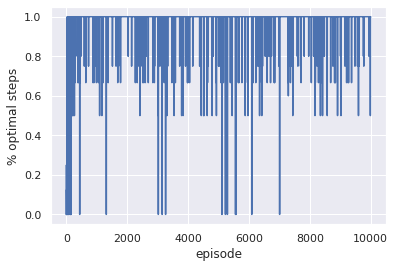

In [13]:
# Plot the percentage of optimal steps taken per episode
percentage_optimal_steps = optimal_step_count/total_step_count
plt.plot(percentage_optimal_steps)
plt.ylabel('% optimal steps')
plt.xlabel('episode')

Text(0.5, 0, 'episode')

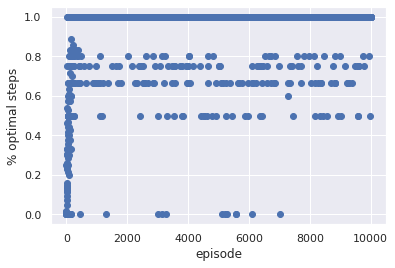

In [14]:
# Plot the percentage of optimal steps taken per episode
percentage_optimal_steps = optimal_step_count/total_step_count
plt.scatter(range(num_episodes), percentage_optimal_steps)
plt.ylabel('% optimal steps')
plt.xlabel('episode')

Text(0.5, 0, 'episode')

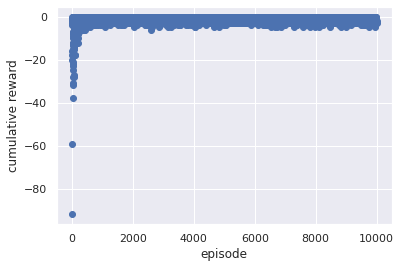

In [15]:
# Cumulative reward for each episode
plt.scatter(range(num_episodes), rewards_all_episodes)
plt.ylabel('cumulative reward')
plt.xlabel('episode')